<a href="https://colab.research.google.com/github/Wiz80/Deep-Learning/blob/master/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

El dataset a usar tiene en cuenta ciertas caracteristicas de casas como el indice de seguridad del barrio, número de habitaciones, el área, etc. Por otra parte los targets son los precios que cada casa con sus respectivas caracteristicas tiene 

In [ ]:
from keras.datasets import boston_housing 
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [ ]:
print(f'Valor mínimo : {min(train_targets)}')
print(f'Valor máximo : {max(train_targets)}')

Valor mínimo : 5.0
Valor máximo : 50.0


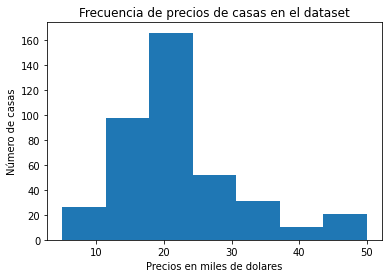

In [ ]:
plt.hist(train_targets, bins = 7)
plt.title('Frecuencia de precios de casas en el dataset')
plt.xlabel('Precios en miles de dolares')
plt.ylabel('Número de casas')
plt.show()


Es necesario hacer una normalización de los datos

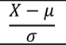

In [ ]:
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std
test_data -= mean 
test_data /= std

Construcción del modelo


In [ ]:
from keras import models
from keras import layers
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, 
                         activation = 'relu', 
                         input_shape = (train_data.shape[1],)))

  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
  return model 

Como el precio de las casas es un valor continuo, el último layer no tiene activación debido a que este layer es puramente lineal y permite que se prediga cualquier valor, sí se limitara una activación esta haría que se diera un valor por ejemplo con sigmoid entre 0 y 1.
Usualmente es muy común ver la función de perdida mse para problemas de regresión.

For instance, an MAE of 0.5 on this problem would mean your predictions are off by $500 on average. 

Sí el dataset es muy pequeño generará problemas con las validaciones debido a que dependiendo de la cantidad de datos que se tomen dependerá el sesgo, esto porque empieza a influir en gran medida la cantidad de datos que se toman. Para evitar este problema se usa una forma de validación llamada k-fold cross-validation, que consiste en K particiones de los datos disponibles, con k modelos y entrenando k-1 particiones  

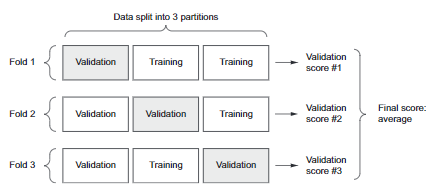

In [ ]:
#K-fold validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [ ]:
for i in range(k):
  print(f'processing fold # {i}')
  val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples : (i+1)*num_val_samples]
  
  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples],
       train_data[(i+1)*num_val_samples:]],
       axis = 0
  )
  
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i+1)* num_val_samples:]],
       axis = 0
  )

  model = build_model()
  model.fit(partial_train_data, 
            partial_train_targets,
            epochs = num_epochs,
            batch_size = 1, 
            verbose = 0)
  
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
  all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
all_scores

[2.258559465408325, 2.3841052055358887, 2.509845733642578, 2.973301410675049]

In [ ]:
np.mean(all_scores)

2.53145295381546

In [ ]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
  print(f'processing fold # {i}')
  val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples : (i+1)*num_val_samples]
  
  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples],
       train_data[(i+1)*num_val_samples:]],
       axis = 0
  )
  
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i+1)* num_val_samples:]],
       axis = 0
  )

  model = build_model()
  history = model.fit(partial_train_data, 
            partial_train_targets,
            epochs = num_epochs,
            batch_size = 1, 
            verbose = 0)
  
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
  all_mae_histories.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
